## Testing

In [12]:
import pickle
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.neighbors import NearestNeighbors

In [2]:
feature_list = np.array(pickle.load(open("effnetb7_features.pkl", "rb")))
feature_list.shape

(44441, 2560)

In [3]:
image_paths = np.array(pickle.load(open("effnetb7_images.pkl", "rb")))
image_paths.shape

(44441,)

In [4]:
# load effnetb7 model
model = tf.keras.models.load_model("effnetb7.keras")

In [5]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb7      │ (None, 7, 7,      │ 64,097,687 │ input_layer_6[0]… │
│ (Functional)        │ 2560)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 2560)      │          0 │ efficientnetb7[0… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2560)      │          0 │ efficientnetb7[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 5120)      │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 2560)      │ 13,109,760 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 2560)      │          0 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 77,207,447 (294.52 MB)

 Trainable params: 13,109,760 (50.01 MB)

 Non-trainable params: 64,097,687 (244.51 MB)

In [25]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm="kd_tree", metric="euclidean")
neighbors.fit(feature_list)

NearestNeighbors(algorithm='kd_tree', metric='euclidean')

In [79]:
image_path = "./sample/image5.jpg"

In [80]:
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
res = model.predict(preprocessed_img).flatten()
normalized_res = res / norm(res)  # L2 Normalization

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


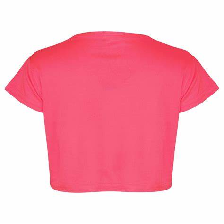

In [81]:
img

In [82]:
normalized_res.shape

(2560,)

In [83]:
distances, indexes = neighbors.kneighbors([normalized_res.flatten()])

In [84]:
print(distances)

[[1.15489398 1.15489398 1.15489398 1.15531449 1.15563105]]


In [85]:
print(indexes)

[[15501 38631 43276 37922  1298]]


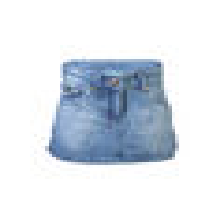

In [86]:
sim_img1 = image.load_img(image_paths[indexes[0][0]], target_size=(224, 224))
sim_img1

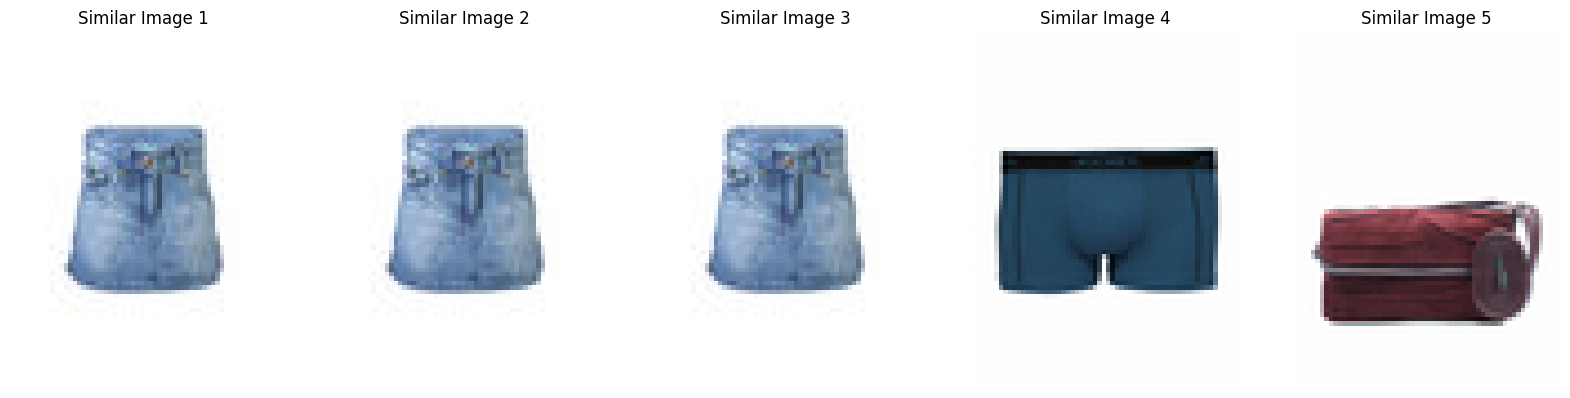

In [87]:
#  display the images from indexes
plt.figure(figsize=(20, 10))
for i, idx in enumerate(indexes[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.load_img(image_paths[idx]))
    plt.title(f"Similar Image {i + 1}")
    plt.axis("off")

plt.show()